In [61]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import mglearn

In [2]:
iris_dataset=load_iris()

In [3]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
print(iris_dataset["DESCR"]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
print("Target names:",iris_dataset["target_names"])

Target names: ['setosa' 'versicolor' 'virginica']


In [11]:
print("Feature names:\n",iris_dataset["feature_names"])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print("Type of data:",type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [13]:
# The rows in the data array correspond to flowers, while the columns represent the four measurements that were taken for each flower

print("Shape of the data:",iris_dataset['data'].shape)

Shape of the data: (150, 4)


In [18]:
df=pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names']) # converting above data into pandas data frame and adding columns using feature_names

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Remember that the individual items are called samples in machine learning, and their properties are called features. The shape of the data array is the number of samples times the number of features. This is a convention in scikit-learn, and your data will always be assumed to be in this shape. Here are the feature values for the first five samples

In [23]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [24]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [32]:
df['target']=iris_dataset['target'] # adding a new column called target and and assigning corresponding target labels to samples  0 means setosa, 1 means versicolor, and 2 means virginica

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
features=df.columns


In [42]:
from sklearn.model_selection import train_test_split


In [50]:
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [52]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [51]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


In [53]:
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

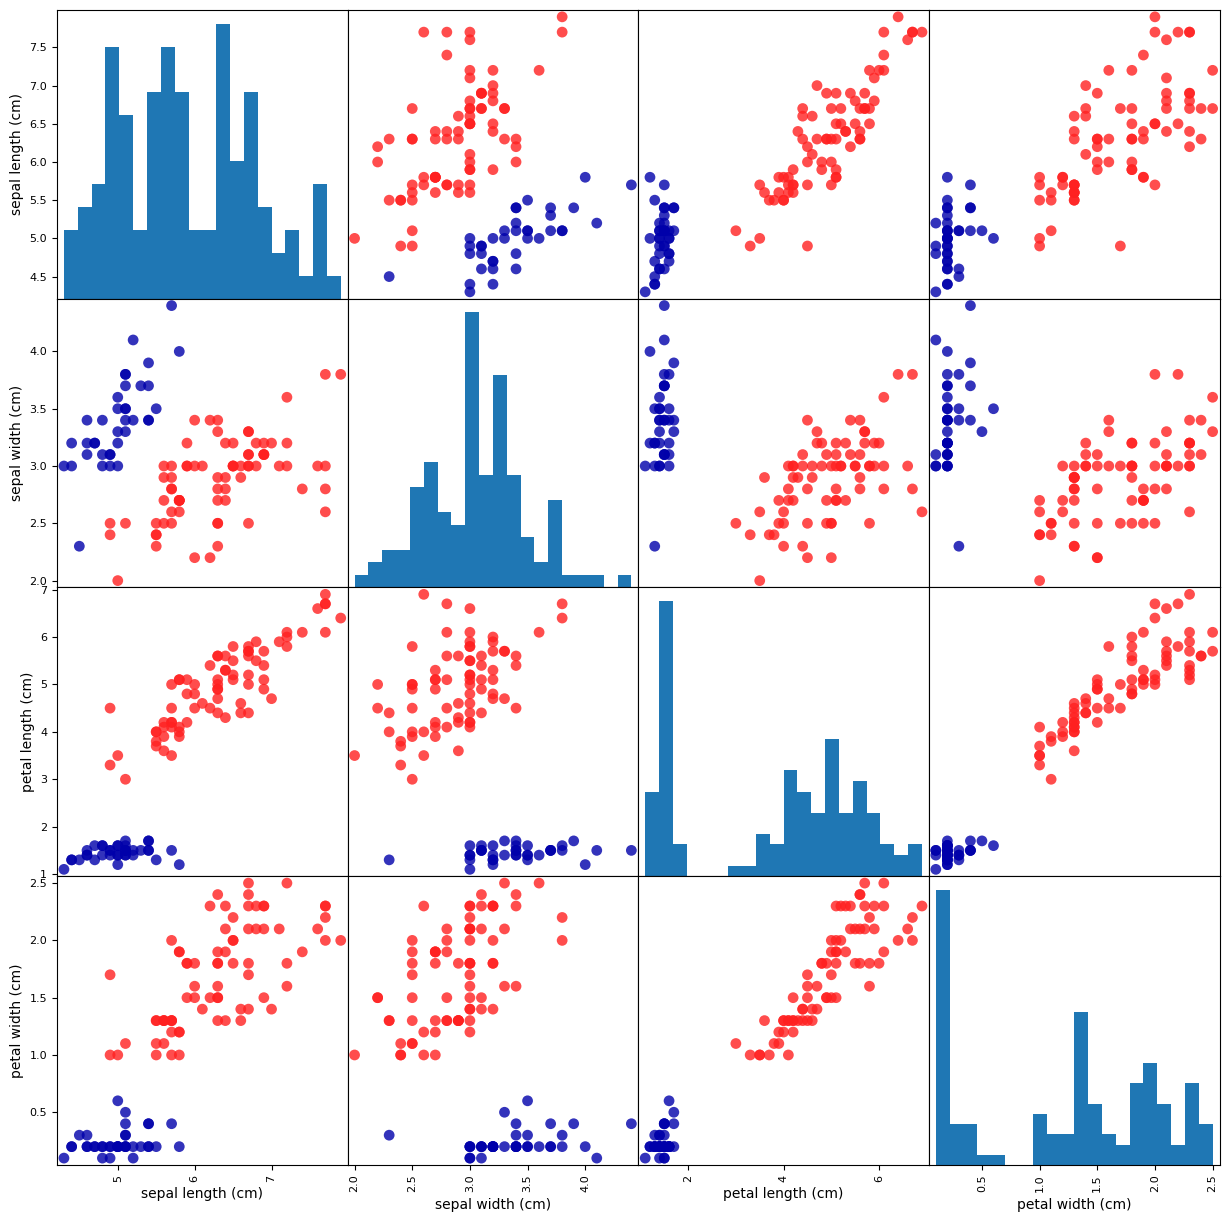

In [57]:
pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm2)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [63]:
X_new=np.array([[5, 2.9, 1, 0.2]]) # Note that we made the measurements of this single flower into a row in a two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data
print("X_new.shape:",X_new.shape)

X_new.shape: (1, 4)


In [67]:
prediction=knn.predict(X_new)
print("Prediction:",prediction)
print("Predicted target name:",iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [69]:
y_pred=knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [70]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [71]:
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set score: 0.97
